## Loading Dataset

- Loading Data California Housing Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
D_feature, Y_target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
D_feature.columns = ['0','1','2','3','4','5','6','7']
D_feature.insert(loc=len(D_feature.columns), column='target', value=Y_target)
D_feature

,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Randomly replace 40% of the first column with NaN values

In [2]:
random.seed(0)
column = D_feature['0']
missing_size = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_size)]
column[i] = np.NaN
print("Number of data:",column.shape[0])
print("Number of NaN:",len(i))
D_feature

Number of data: 20640
Number of NaN: 8256


,0,1,2,3,4,5,6,7,target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,NaN,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,NaN,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 1. Impute the values using scikit-learn SimpleImpute Class

- Imputation Using Mean Value

In [3]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(D_feature)
imputed_train_df = imp_mean.transform(D_feature)
pd.DataFrame(imputed_train_df)

,0,1,2,3,4,5,6,7,8
0,3.87794,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.30140,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.87794,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.64310,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.87794,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.56030,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.55680,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.70000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,3.87794,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- Imputation Using Median Value

In [4]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(D_feature)
imputed_train_df = imp_mean.transform(D_feature)
pd.DataFrame(imputed_train_df)

,0,1,2,3,4,5,6,7,8
0,3.5497,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.5497,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.5497,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,3.5497,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Imputation Using (Most Frequent) or (Zero/Constant) Values:

- Impute the values using scikit-learn SimpleImpute Class

In [5]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(D_feature)
imputed_train_df = imp_mean.transform(D_feature)
pd.DataFrame(imputed_train_df)

,0,1,2,3,4,5,6,7,8
0,3.1250,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.1250,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.1250,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,3.1250,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- Zero or Constant imputation

In [6]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='constant')
imp_mean.fit(D_feature)
imputed_train_df = imp_mean.transform(D_feature)
pd.DataFrame(imputed_train_df)

,0,1,2,3,4,5,6,7,8
0,0.0000,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,0.0000,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,0.0000,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,0.0000,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 3. Imputation Using k-NN:

In [7]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(D_feature.values, k=30)
pd.DataFrame(imputed_training)

,0,1,2,3,4,5,6,7,8
0,3.301179,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,4.313269,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.552823,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.556800,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,3.401893,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 4. Imputation Using Multivariate Imputation by Chained Equation (MICE)

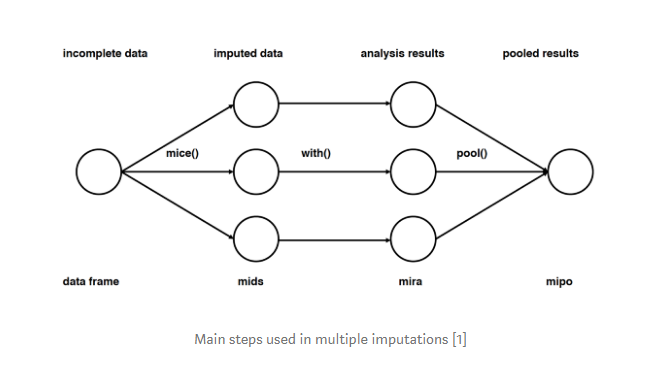

In [8]:
from IPython.display import Image
Image(filename="C:\\Users\\Administrator\\Desktop\\Code_Test\\Code_CHARM_Vu_Luong_Fix_Bug\\CHARM_Example-MC_Scenarios-master\\docs\\MICE.png", width = 800, height = 300)

In [9]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(D_feature.values)
pd.DataFrame(imputed_training)

,0,1,2,3,4,5,6,7,8
0,7.042911,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,6.931901,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,5.280041,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.556800,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,2.392260,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 5. Regression Imputation of Missing Continuous Values

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [20]:
imputer = IterativeImputer(BayesianRidge())
impute_data = pd.DataFrame(imputer.fit_transform(D_feature.values))
pd.DataFrame(impute_data)

,0,1,2,3,4,5,6,7,8
0,7.042472,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,6.930653,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,5.279731,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.556800,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,2.392604,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


References:
    - https://medium.com/towards-artificial-intelligence/handling-missing-data-for-advanced-machine-learning-b6eb89050357
    - https://medium.com/datadriveninvestor/heres-how-you-can-configure-automatic-imputation-of-missing-data-f90245b0ce6f
        